In [1]:
%matplotlib notebook


In [2]:
import pickle as pkl
from graph_tool import Graph, load_graph
from glob import glob
from utils import earliest_obs_node
from gt_utils import edges_to_directed_tree, get_roots
from feasibility import is_arborescence
from tqdm import tqdm

g = load_graph('data/grid-64/graph.gt')

for p in tqdm(glob('outputs/paper_experiment/grid-64/si/no-order/qs/0.9/*.pkl')):
    infection_times, source, obs_nodes, true_edges, pred_edges = pkl.load(open(p, 'rb'))
    root = earliest_obs_node(obs_nodes, infection_times)
    
    t = edges_to_directed_tree(g, root, pred_edges)
    
    assert root in get_roots(t)
    assert is_arborescence(t) 
    

100%|██████████| 100/100 [00:01<00:00, 50.82it/s]


In [3]:
g = load_graph('data/grid-64/graph.gt')
p = 'outputs/paper_experiment/grid-64/si/no-order/qs/0.25/90.pkl'
infection_times, source, obs_nodes, true_edges, pred_edges = pkl.load(open(p, 'rb'))
root = earliest_obs_node(obs_nodes, infection_times)
print(root)
t = edges_to_directed_tree(g, root, pred_edges)

assert is_arborescence(t)    

24


In [5]:
root

24

In [6]:
from infer_time import TopDownVisitor, BottomUpVisitor
from gt_utils import bottom_up_traversal
from graph_tool.search import bfs_search

td_vis = TopDownVisitor(np.ones(g.num_vertices(), dtype=np.int) * -1, root, obs_nodes)
bfs_search(t, source=root, visitor=td_vis)

bu_vis = BottomUpVisitor(np.ones(g.num_vertices(), dtype=np.int) * -1, root, obs_nodes)
bottom_up_traversal(t, vis=bu_vis)

In [11]:
from steiner_tree import get_steiner_tree
from utils import extract_edges
from feasibility import is_arborescence
t = get_steiner_tree(g, obs_nodes)
extract_edges(t)
is_arborescence(t)

should be: only root has no parent


False

<IPython.core.display.Javascript object>


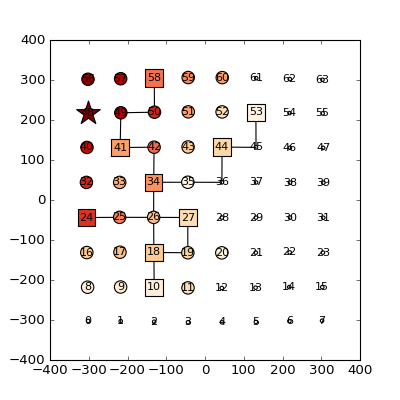

In [4]:
from matplotlib import pyplot as plt

from plot_utils import plot_snapshot
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

gnx = nx.read_graphml('data/grid/2-6/graph.graphml')
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
pos = graphviz_layout(gnx, root=0)


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax,
              edges=pred_edges)